In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

import scipy
import warnings

warnings.filterwarnings('ignore')

**Objective:**

Understand the Dataset & cleanup (if required).

Build classification models to predict the wine quality.

Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

# Importing Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-quality-dataset/WineQT.csv


In [3]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
print("Data types: \n{}".format(df.dtypes))

Data types: 
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [6]:
print(f'Print the columns in the given dataset: \n{df.columns}')

Print the columns in the given dataset: 
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [7]:
print(f'Checking null values of the given dataset: \n{df.isnull().sum()}')

Checking null values of the given dataset: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [8]:
print(f'The description of the given data: ')
print()
print({df.info()})

The description of the given data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
{None}


**Basic Statstics**

In [9]:
df.corr().style.background_gradient(cmap = 'Greys')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [10]:
df.describe().T.style.background_gradient(cmap = 'Greys')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [11]:
print('Checking any duplicated values in given dataframe: {}'.format(df.duplicated().sum()))

Checking any duplicated values in given dataframe: 0


In [12]:
df.duplicated().sum()

0

# Exploratory Data Analysis(EDA)

**Univariate Analysis:**

“Uni” means one and “Variate” means variable hence univariate analysis means analysis of one variable or one feature. Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [14]:
df['fixed acidity']

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1138     6.3
1139     6.8
1140     6.2
1141     5.9
1142     5.9
Name: fixed acidity, Length: 1143, dtype: float64

In [15]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

In [16]:
num_feat = df.select_dtypes(exclude = 'object')

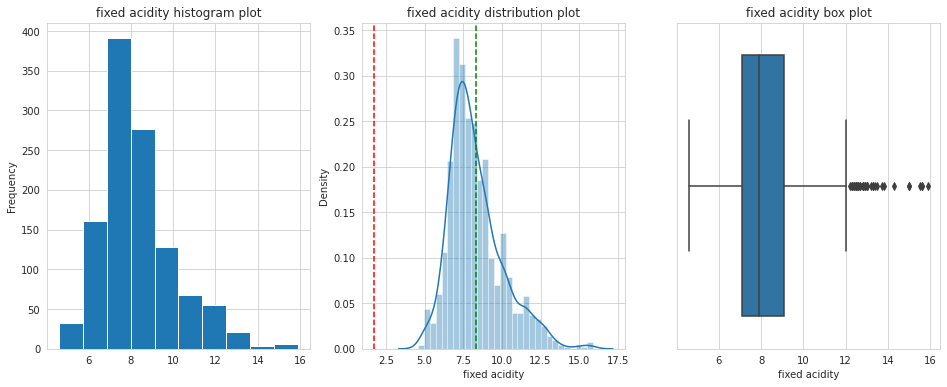

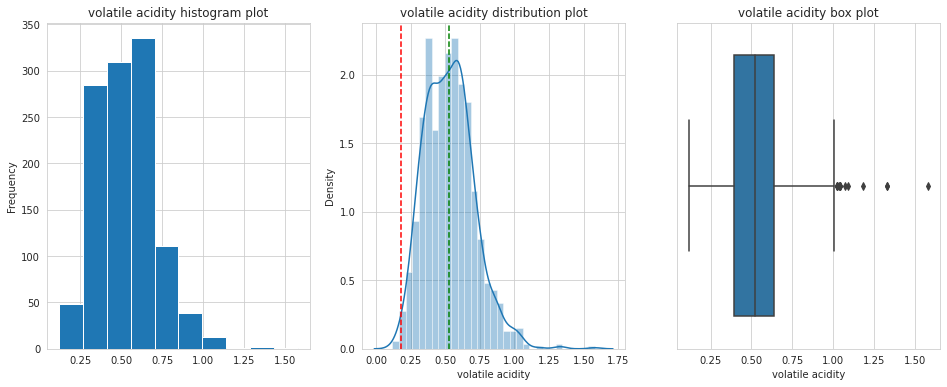

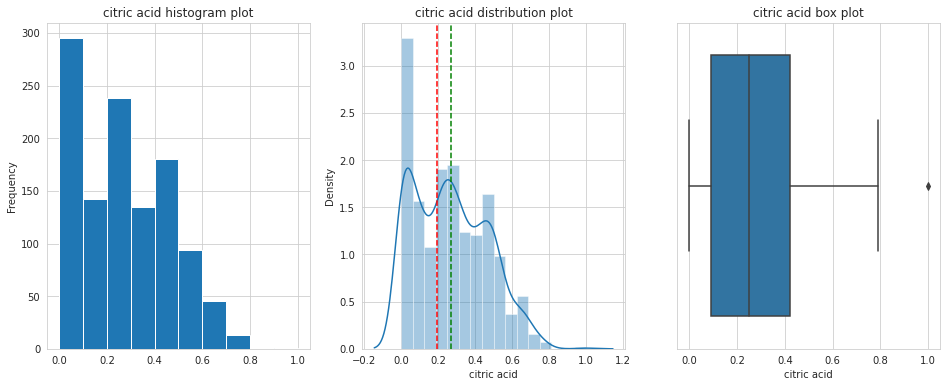

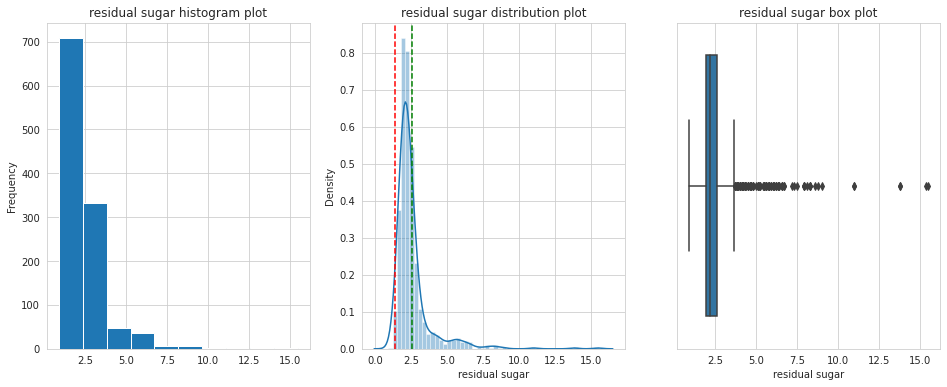

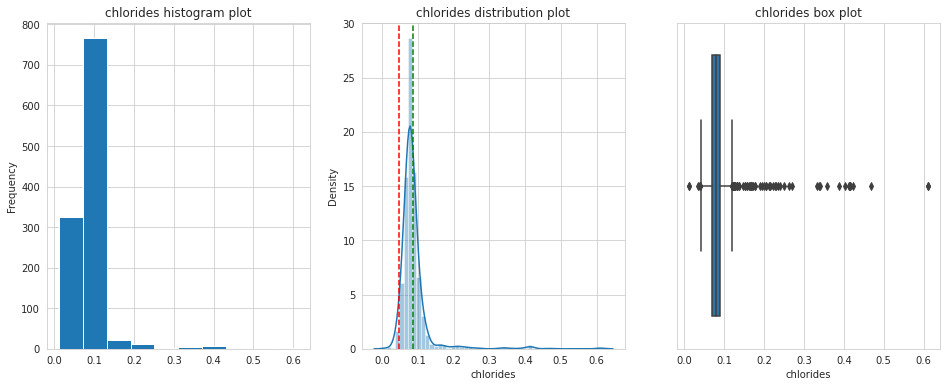

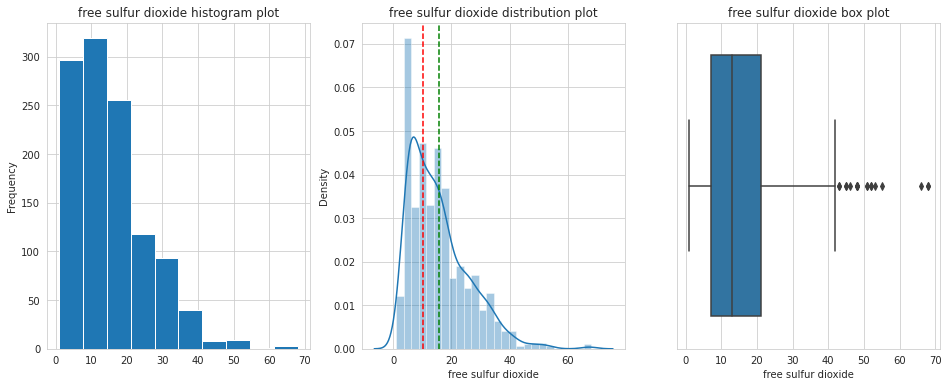

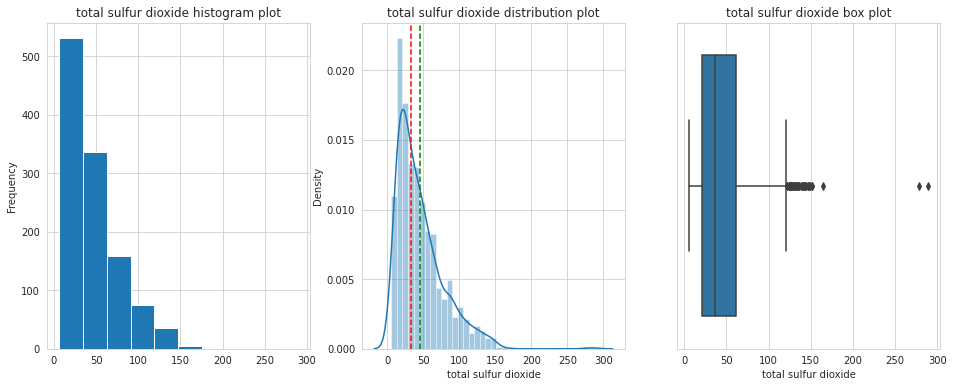

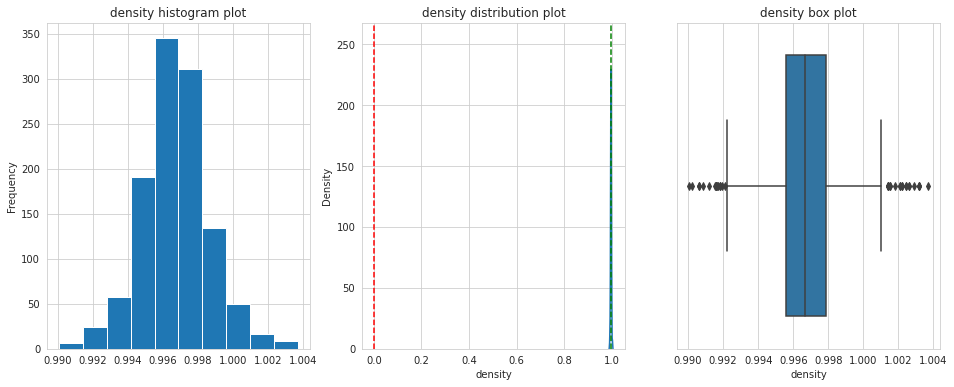

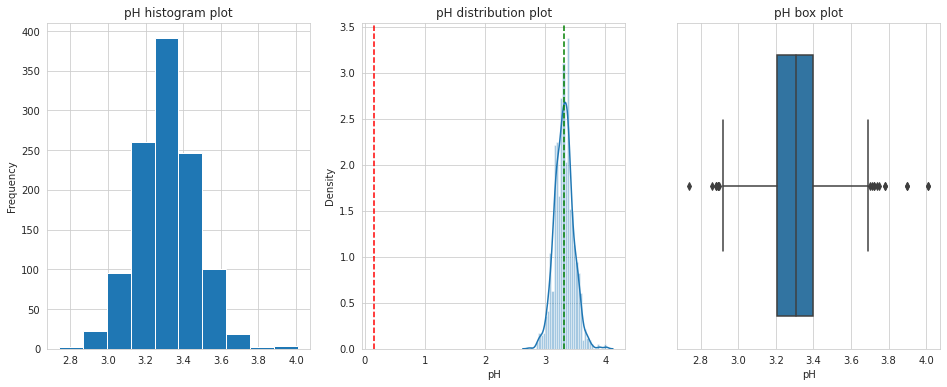

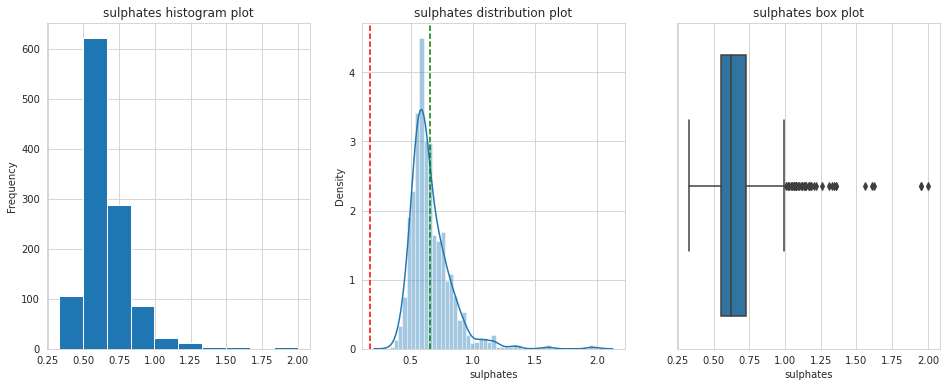

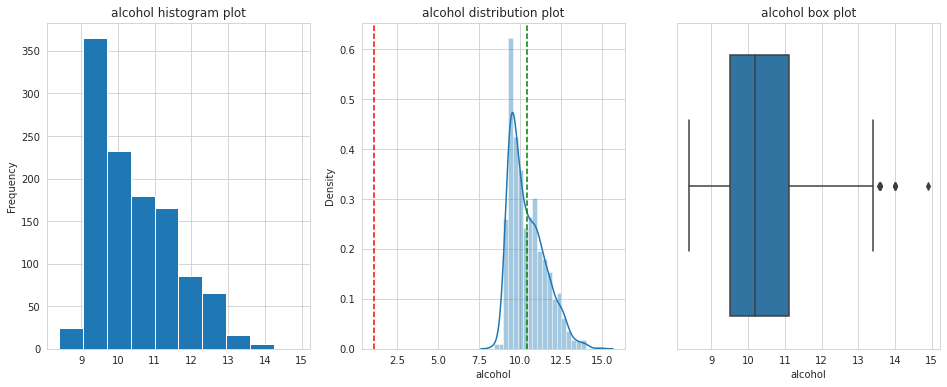

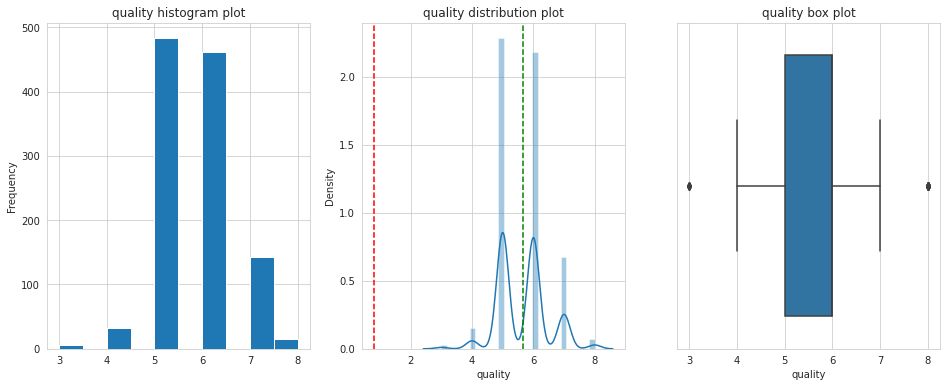

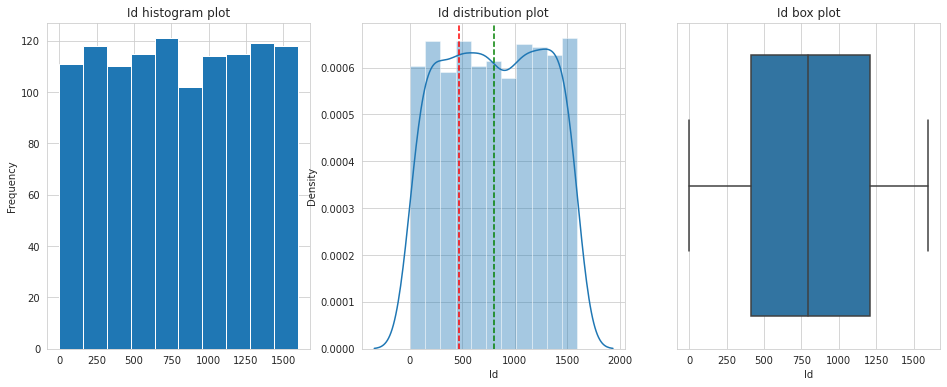

In [17]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

**Bivariate Analysis:**

Bivariate Analysis is used to find the relationship between two variables. Analysis can be performed for combination of categorical and continuous variables. Scatter plot is suitable for analyzing two continuous variables. It indicates the linear or non-linear relationship between the variables.

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

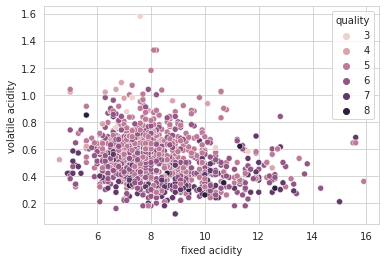

In [19]:
sns.scatterplot(data = df, x = df['fixed acidity'], y = 'volatile acidity', hue='quality')

<AxesSubplot:xlabel='citric acid', ylabel='residual sugar'>

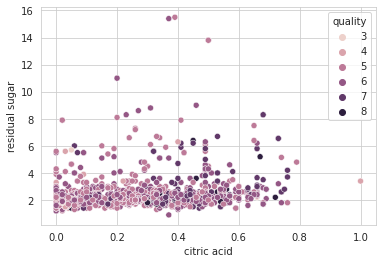

In [20]:
sns.scatterplot(data = df, x = 'citric acid', y= df['residual sugar'], hue = 'quality')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

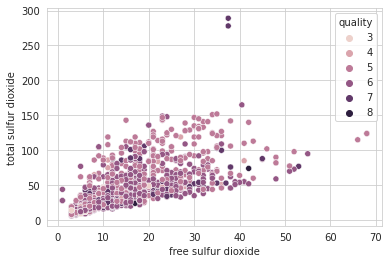

In [21]:
sns.scatterplot(x = df['free sulfur dioxide'], y=df['total sulfur dioxide'], hue = df['quality'])

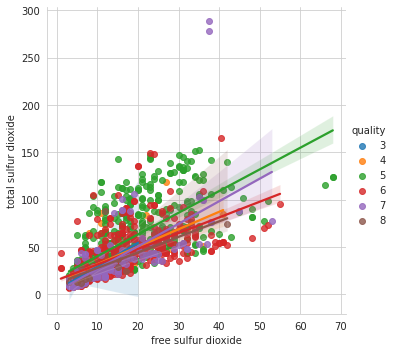

In [22]:
sns.lmplot(data=df, x = 'free sulfur dioxide', y='total sulfur dioxide', hue = 'quality')

<AxesSubplot:xlabel='pH', ylabel='sulphates'>

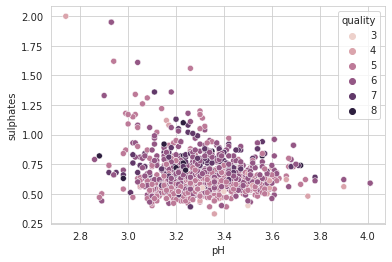

In [23]:
sns.scatterplot(x = df['pH'], y = df['sulphates'], hue = df['quality'])

<AxesSubplot:>

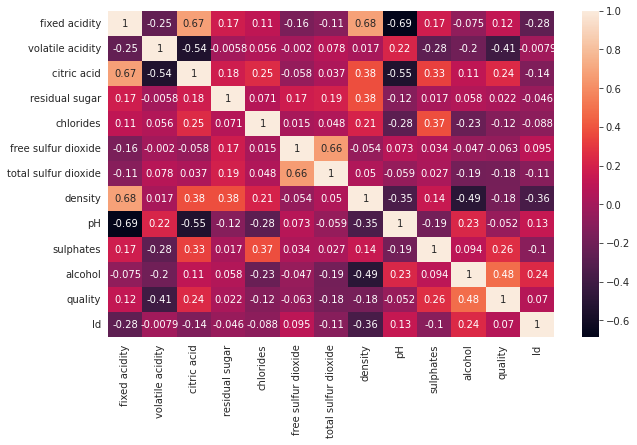

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

# Model Building

In [25]:
df.drop('Id', axis = 1, inplace=True)

In [26]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import catboost

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [29]:
print(f'Shape of the X_train: {X_train.shape}')
print(f'Shape of the X_test: {X_test.shape}')
print(f'Shape of the y_train: {y_train.shape}')
print(f'Shape of the y_test: {y_test.shape}')

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [30]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    print('Starting ...')
    
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    
    print("**********************************")
    
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
    
    print("Evaluation process is done ...")
    
    print("***********************************************")
    
    return mod

In [31]:
rfc = RandomForestClassifier()
model_evaluation(rfc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.76      0.76      0.76       102
           6       0.64      0.75      0.69        91
           7       0.72      0.48      0.58        27
           8       1.00      0.50      0.67         2

    accuracy                           0.70       229
   macro avg       0.52      0.42      0.45       229
weighted avg       0.68      0.70      0.69       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  4  2  0  0]
 [ 0  0 78 24  0  0]
 [ 0  0 18 68  5  0]
 [ 0  0  2 12 13  0]
 [ 0  0  0  1  0  1]]
Accuracy 

RandomForestClassifier()

In [32]:
dtc = DecisionTreeClassifier()
model_evaluation(dtc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.17      0.25         6
           5       0.69      0.74      0.71       102
           6       0.60      0.57      0.59        91
           7       0.54      0.56      0.55        27
           8       0.25      0.50      0.33         2

    accuracy                           0.63       229
   macro avg       0.43      0.42      0.40       229
weighted avg       0.63      0.63      0.62       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  1  2  3  0  0]
 [ 0  0 75 23  4  0]
 [ 0  1 28 52  8  2]
 [ 0  0  3  8 15  1]
 [ 0  0  0  0  1  1]]
Accuracy 

DecisionTreeClassifier()

In [33]:
svc = SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.64      0.42      0.51       102
           6       0.45      0.80      0.58        91
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.51       229
   macro avg       0.18      0.20      0.18       229
weighted avg       0.46      0.51      0.46       229

Confusion Matrix of the given Model: 
 [[ 0  0  0  1  0  0]
 [ 0  0  2  4  0  0]
 [ 0  0 43 59  0  0]
 [ 0  0 18 73  0  0]
 [ 0  0  4 23  0  0]
 [ 0  0  0  2  0  0]]
Accuracy 

SVC()

In [34]:
xgb = xgboost.XGBClassifier()
model_evaluation(xgb, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
[02:29:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.74      0.74      0.74       102
           6       0.62      0.69      0.65        91
           7       0.67      0.52      0.58        27
           8       0.25      0.50      0.33         2

    accuracy                           0.67       229
   macro avg       0.38      0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
cat = catboost.CatBoostClassifier()
model_evaluation(cat, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Learning rate set to 0.078765
0:	learn: 1.6959588	total: 62.7ms	remaining: 1m 2s
1:	learn: 1.6152352	total: 67.4ms	remaining: 33.6s
2:	learn: 1.5420301	total: 71.5ms	remaining: 23.8s
3:	learn: 1.4790990	total: 77.3ms	remaining: 19.2s
4:	learn: 1.4272293	total: 82.4ms	remaining: 16.4s
5:	learn: 1.3801140	total: 87ms	remaining: 14.4s
6:	learn: 1.3378452	total: 91.6ms	remaining: 13s
7:	learn: 1.3007202	total: 96.1ms	remaining: 11.9s
8:	learn: 1.2666360	total: 100ms	remaining: 11.1s
9:	learn: 1.2357985	total: 107ms	remaining: 10.6s
10:	learn: 1.2053916	total: 111ms	remaining: 9.97s
11:	learn: 1.1786206	total: 115ms	remaining: 9.45s
12:	learn: 1.1573092	total: 120ms	remaining: 9.1s
13:	learn: 1.1335753	total: 124ms	remaining: 8.76s
14:	learn: 1.1114943	total: 128ms	remaining: 8.43s
15:	learn: 1.0926481	total: 133ms	remaining: 8.17s
16:	learn: 1.0763406	total: 137ms	remaining: 7.

**Conclusion**

Catboost Model predicted well compare than other models.